In [66]:
# Import numerical resources
import numpy as np
import random as rn

# Import graphics resources
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook

In [67]:
x = np.linspace(0,1.0,9); print x
dx = x[1]-x[0]; print dx

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]
0.125


In [68]:
D = 1.0

In [69]:
dt = dx**2/2/D / 10; print dt
nt = 20 # Number of time steps
t = dt*nt; print t

0.00078125
0.015625


In [70]:
C = (dt * D) / (dx**2); print C # For constants in "propagate" function 

0.05


In [71]:
# Starting f(t,x) as 2-D array of random numbers; pseudo: f[time][x]; n = 0 row stores initial field

f = np.array([[rn.random() for i in range(len(x))] for j in range(int(t/dt)+1)]); print f; # Adding a time row to include intial field

[[ 0.11146147  0.28481008  0.61088707  0.39904823  0.82430387  0.29268444
   0.53295283  0.53233134  0.48282215]
 [ 0.04801678  0.90565448  0.09727661  0.88003319  0.62843802  0.65003572
   0.69654072  0.76626722  0.04989266]
 [ 0.60502029  0.96670776  0.45597053  0.55686033  0.67012011  0.85108383
   0.52661529  0.94552372  0.75043139]
 [ 0.75157217  0.5905029   0.11739979  0.49557853  0.48110234  0.95516756
   0.98821078  0.32970964  0.27322998]
 [ 0.99554004  0.17203936  0.8969656   0.4050947   0.36030152  0.82702765
   0.93468853  0.94568817  0.51797072]
 [ 0.39927189  0.48746304  0.58526818  0.15355566  0.02836261  0.16234707
   0.94330189  0.85383084  0.95815603]
 [ 0.00812882  0.55346422  0.91262362  0.06785066  0.7479317   0.00879944
   0.04460524  0.91818494  0.42070964]
 [ 0.62128251  0.36943025  0.02849361  0.78090008  0.67433986  0.30087169
   0.0553675   0.60426212  0.43994762]
 [ 0.34345323  0.91118258  0.1740062   0.34051997  0.87049488  0.46282692
   0.14656223  0.42625

In [72]:
# Function that iterates diffusion values through number of time steps
def propagate(f, nt, dt):
    # nt = len(f) - 1 # not including initial field in number of time steps
    # print nt
    t_tot = [0.0]
    t = 0.0
    for n in range(0, nt) :
        t += dt
        t_tot.append(t)
        for k in range(0, len(x)):
            f_pre = f[n][k] 
            if k == 0:
                f[n+1][k] = C * ( f[n][len(x)-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hi'

            elif k == (len(x) - 1):
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][0] ) + f_pre
                # print'hello'
            else:
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hey'
                
    return f, t_tot

In [73]:
f, t_tot = propagate(f,nt,dt)
xgrid, tgrid = np.meshgrid(x,t_tot)

%whos

Variable    Type             Data/Info
--------------------------------------
Axes3D      type             <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
C           float64          0.05
D           float            1.0
ax          Axes3DSubplot    Axes(0.125,0.1;0.775x0.8)
dt          float64          0.00078125
dx          float64          0.125
f           ndarray          21x9: 189 elems, type `float64`, 1512 bytes
fig         Figure           Figure(640x480)
i           int              8
j           int              20
np          module           <module 'numpy' from '//a<...>ages/numpy/__init__.pyc'>
nt          int              20
plt         module           <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
propagate   function         <function propagate at 0x11fbd0758>
rn          module           <module 'random' from '//<...>ib/python2.7/random.pyc'>
t           float64          0.015625
t_tot       list             n=21
tgrid       ndarray          21x9: 189 elems, 

<IPython.core.display.Javascript object>


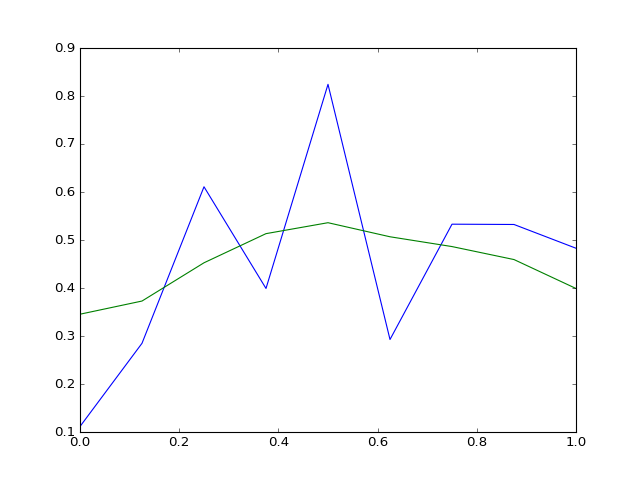

In [74]:
# This graphs first and last
plt.figure()
plt.plot(x,f[0])
plt.plot(x,f[-1])

<IPython.core.display.Javascript object>


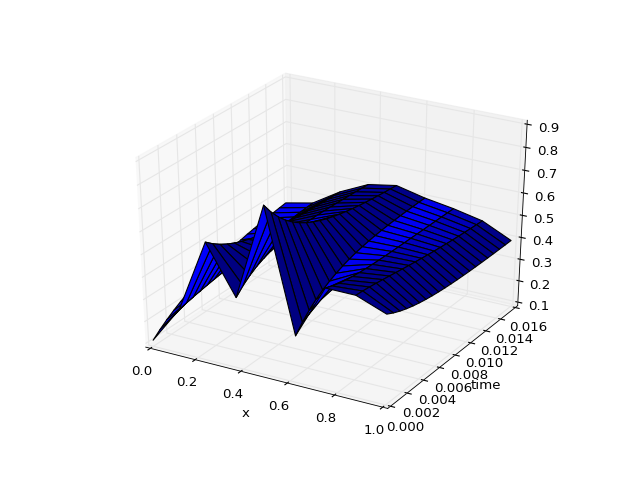

In [75]:
# This plots the solution as a function of time and space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, tgrid, f, rstride=1,cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('time')